In [ ]:
# 선형 회귀 이론 및 실습
# https://velog.io/@changhtun1/python-%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5

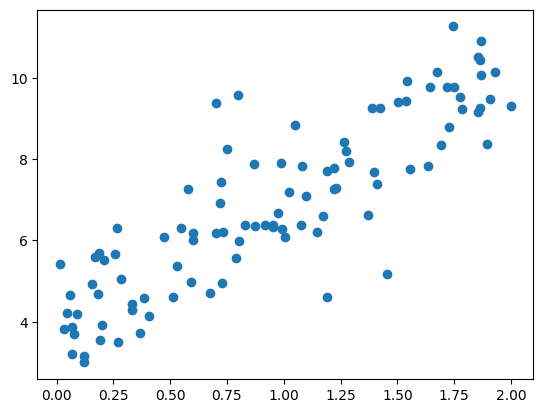

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = 2 * np.random.rand(100,1) # (0, 1) 범위에서 균일한 분포 100 X 1 array
y = 4 + 3*x + np.random.randn(100,1) # normal distribution(mu=0,var=1)분포 shape : 100 X 1 array
plt.scatter(x,y)
plt.show()

In [3]:
x_b = np.c_[np.ones((100,1)),x] # 모든 샘플에 index 0번에 1을 추가

# np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
# .dot은 행렬 곱셈
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

'\n> array([[ 4.93296992],\n       [-0.41991499]])\n       '

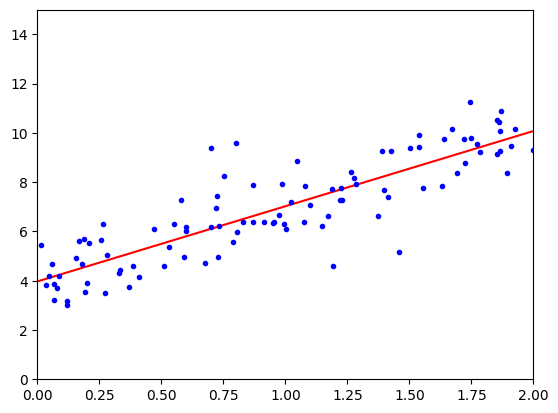

In [4]:
'''
기존의 목적함수가 y = 4 + 3*x + np.random.randn(100,1)라서,
예측한 θ0 : 4, θ1 : 3을 기대했지만, 비슷하긴해도 노이즈 때문에 원래의 파라미터를 맞출 수 없었다.
'''

# theta_best를 사용해서 y 값 예측
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
prediction = x_new_b.dot(theta_best)
prediction
plt.plot(x_new,prediction,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15]) # x축 범위 0~2, y축 범위 0~15
plt.show()

In [5]:
# 위와 같은 작업을 아래와 같이 sklearn(사이킷런) 라이브러리를 사용하여 구현할 수 있다.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
print(lin_reg.predict(x_new))
'''
나중에 현업이나 다른 프로젝트 들어 갔을 때 한번 기본적으로 어떤 만약에 목적함수가
연속 형이다 라고 하면 그냥 bass 모델 처럼 linear regression 해서 fit(x,y)한 다음에 한벅 찍어봐라.
찍어보고 시작해도 좋다.
'''

[3.97024902] [[3.05184203]]
[[ 3.97024902]
 [10.07393308]]


In [5]:
# 경사 하강법 구현 (implementation)
import numpy as np

x = 2 * np.random.rand(100,1) # 100 x 1
x_b = np.c_[np.ones((100,1)),x]
y = 4 + 3*np.random.randn(100,1)

learning_rate = 0.001
iterations = 1000
m = x_b.shape[0] # x의 데이터 수

theta = np.random.randn(2,1)

for iteration in range(iterations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - (learning_rate*gradients)

theta

array([[1.84337369],
       [2.09980353]])

In [7]:
# 확률적 경사 하강법 구현(implementation)
epochs = 1000
t0,t1 = 5,50 # 학습 스케쥴 (하이퍼 파라미터)
m = x_b.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for epoch in range(epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0 ~ m-1까지 랜덤 숫자 1
    xi = x_b[random_index:random_index:+1] # 1 x 2 크기
    yi = y[random_index:random_index+1] # 1 x 1 크기
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi) # 1 => mini_m
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gradients

theta

array([[-0.96463716],
       [-0.85656317]])

In [11]:
'''
1차 방정식
y = ax

n차 방정식
y = ax + ax^2 + ax^3 + .....
이렇게 계속 가는 것을 PolynomialFeatures 라이브러리가 하는 특
'''

import numpy as np
data_num = 1000
x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * (x**2) + np.random.randn(1000,1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[0.45941854]
[0.45941854 0.2110654 ]


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)

[-0.06226383] [[-0.01270158  0.2518007 ]]


In [17]:
# 훈련 세트와 검증 세트의 모델 성능을 살펴 보는 것
# (모델 과적합을 가시적으로 확인하는 법)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model,x,y):
  x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
  train_errors,val_errors = [],[]
  for num in range(1,len(x_train)):
    model.fit(x_train[:num],y_train[:num])
    y_train_predict = model.predict(x_train[:num])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:num],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train_set')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val_set')
  plt.legend()
  plt.show()

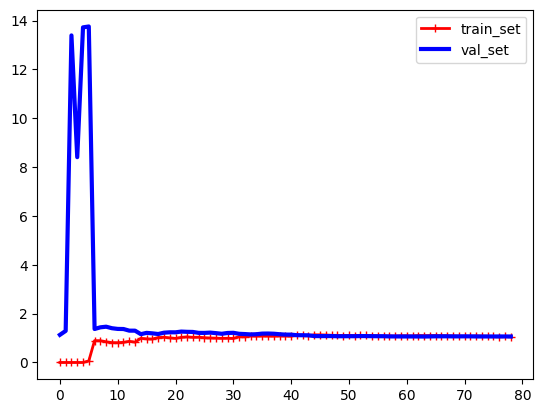

In [14]:
# basis function(4차 다항식)과 모델을 파이프라인을 거쳐서 바로 모델링 및 평가하는 법
# 요즘 데이터분석 회사에서는 파이프라인을 좀 아는 사람을 구한다.
'''
말이 파이프라인이지 파이프가 어떻게 보면 연결-연결-연결 되어 있다.
근데 그냥 basis function 클릭하고 엔터치고 또 모델 엔터치고 이렇게 하나씩 하는 것 보다,
실제로 파이프라인을 하면 한 번에 연결을 해 줄 수 있기 때문에 파이프라인을 해두면
나중에 어떤 모델에 있어 가지고 이 특성의 basis function만 바꿔서 바로 모델 전처리과 모델링을
한번에 다 해 놓을 수 있는 그런 개념이다.
'''
from sklearn.pipeline import Pipeline
data_num = 100
x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * x**2 + np.random.randn(100,1)
polynomial_regression = Pipeline([
  ("poly_features",PolynomialFeatures(degree=4,include_bias=False)),
  ("lin_reg",LinearRegression())
  ])
plot_learning_curves(polynomial_regression,x,y)

In [18]:
# Lasso Regression (라쏘 회귀)
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([0.31468232])